<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 2</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$1^{st}$ May, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [ ]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'sdeuss2s'
member2 = 'mhelap2s'

# Build a spam classifier using Naive Bayes[100 points]

In [1]:
#Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
%matplotlib inline

## Step 1:- Load your data[10 points]
#### There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). Load the dataset using pandas.

In [2]:
#Load your dataset in this cell
def loadData(file_name):
    '''
    Load the data from csv or txt files
    
    
    Parameter
    ----------
    file_name : The file to load
    
    Returns
    ----------
    Return requested file
    
    
    '''

    
    
    
    if file_name=='train1':
        return pd.read_csv("TrainDataset1.csv")


    if file_name=='train2':
        return pd.read_csv("TrainDataset2.csv")

    if file_name=='train3':
        return pd.read_csv("TrainDataset3.txt",delimiter="\t",header=None)

    if file_name=='sms':
        return pd.read_csv("SMSSpamCollection.txt",delimiter="\t",header=None)
        

    if file_name=='test':
        return pd.read_csv("TestDataset.csv")
        
   


        





## Step 2:- Preprocess the data[20 points]
#### Analyse the data, for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words (Research how to do this [Hint:- see how the texts are pre-processed in Natural Language Processing]) use any libraries that you feel comfortable. Now Combine them into one big data set for the training.

In [3]:
#Pre-process the data
def preProcessing():
    
    train1=loadData('train1')
    train2=loadData('train2')
    train3=loadData('train3')
    
## Replacing the column names with type and text for uniformity

    
    train2.rename(columns = {'v1':'type', 'v2':'text'}, inplace = True)   
    train3.rename(columns = {0:'type', 1:'text'}, inplace = True)
    
    
## Combine all three data sets jnto one train data 

    train_data=pd.concat([train1,train2,train3])


## Define list of classes and variables
## List of punctiation to remove
    punctuation_list=['.',',','!']
    lemmatizer = WordNetLemmatizer()
    
    # Iterate through rows for preprocessing the data

    
    for index, row in train_data.iterrows():
        
        if index>2:
            break
            
            
#         bf=row["text"]
#         print(f'before \n{bf}') 
        
        ##Remove words with less than 1 letter
        
        
        ## Remove punctuation
        
        for punc in punctuation_list:
            row["text"]=row["text"].replace(punc,' ')
            
            
            
        ## Removing double white spaces
        row["text"]=row["text"].replace('  ',' ')
        
        
        
        ## Putting all words in lower case
        row["text"]=row["text"].lower()
        
        
        ##Lemmatising
        row["text"]=lemmatizer.lemmatize(row["text"])
        
        ## Remove stop words(thought this order is better )
        

#         af=row['text']
#         print(f'after \n{af} \n\n')
        

   
    
    
    
    return train1,train2,train3,train_data
    

## Step 3:- Visualise the data[20 points]
#### Try to visualize and analyse the data such as before and after pre processing, number of ham/spam etc. Analyse as many verticals you can, feel free to use graphical libraries like seaborn.

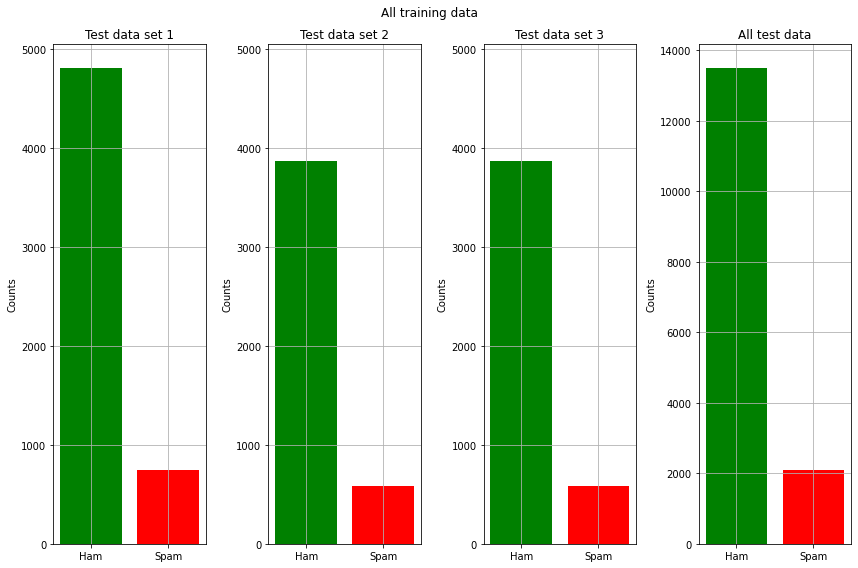

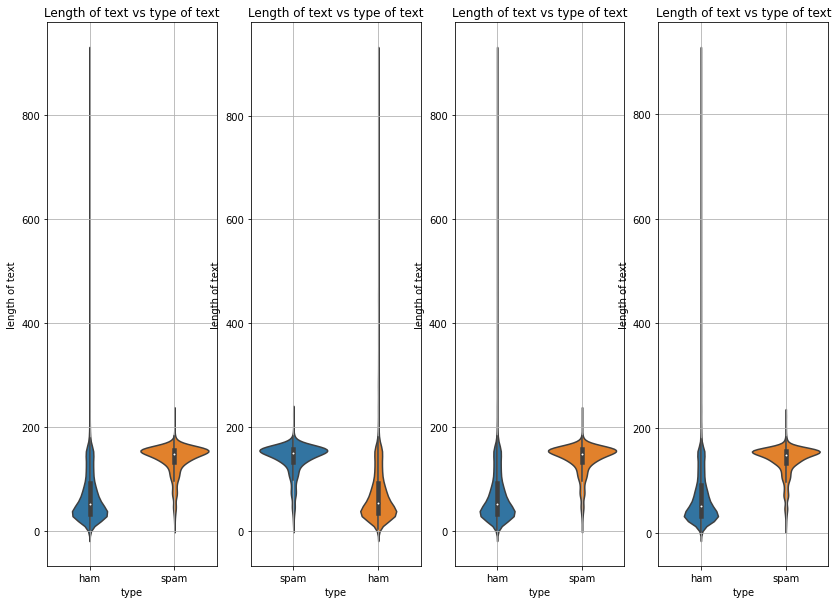

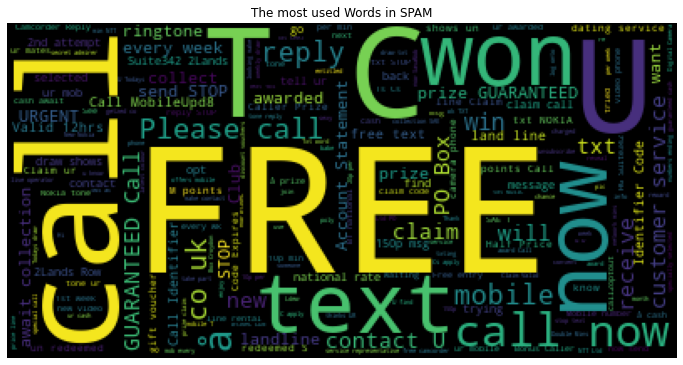

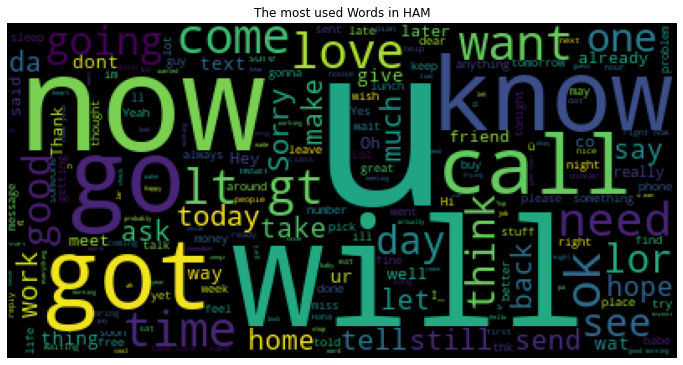

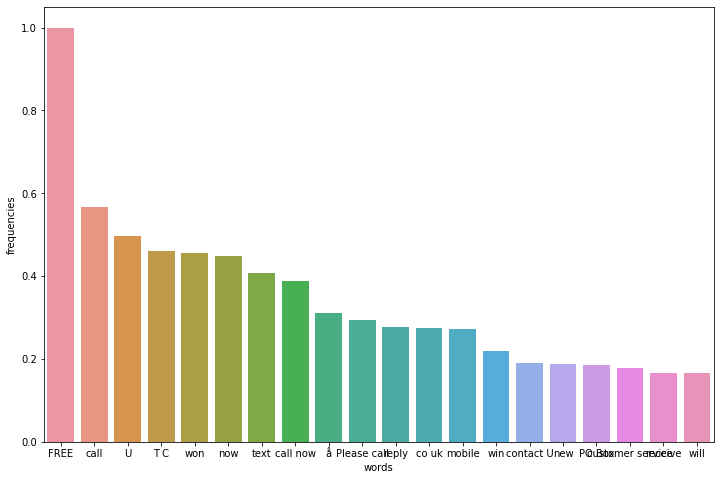

In [6]:
train1,train2,train3,train_full=preProcessing()





ham1,spam1=train1['type'].value_counts()
ham2,spam2=train2['type'].value_counts()
ham3,spam3=train3['type'].value_counts()
ham4,spam4=train_full['type'].value_counts()


figure1=plt.figure(figsize=(12,8))

ax1=figure1.add_subplot(141)
ax1.bar(['Ham','Spam'],[ham1,spam1],color=['green', 'red'])
ax1.set(title='Test data set 1',ylabel='Counts')

ax2=figure1.add_subplot(142,sharex=ax1,sharey=ax1)
ax2.bar(['Ham','Spam'],[ham2,spam2],color=['green', 'red'])
ax2.set(title='Test data set 2',ylabel='Counts')


ax3=figure1.add_subplot(143,sharex=ax1,sharey=ax1)
ax3.bar(['Ham','Spam'],[ham2,spam2],color=['green', 'red'])
ax3.set(title='Test data set 3',ylabel='Counts')

ax4=figure1.add_subplot(144)
ax4.bar(['Ham','Spam'],[ham4,spam4],color=['green', 'red'])
ax4.set(title='All test data',ylabel='Counts')





figure1.suptitle('All training data')
figure1.tight_layout(pad=1)


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()



## Violin Plots

figure2=plt.figure(figsize=(14,10))
ax4=figure2.add_subplot(141)
word_length_visualizations1 = train1.copy()
word_length_visualizations1["length of text"] = word_length_visualizations1["text"].apply(lambda x: len(x))
ax4.set(title='Length of text vs type of text')
ax4=sns.violinplot(x="type",y="length of text",data=word_length_visualizations1)
ax4.grid()

ax5=figure2.add_subplot(142)
word_length_visualizations2 = train2.copy()
word_length_visualizations2["length of text"] = word_length_visualizations2["text"].apply(lambda x: len(x))
ax5.set(title='Length of text vs type of text')
ax5=sns.violinplot(x="type",y="length of text",data=word_length_visualizations2)
ax5.grid()

ax6=figure2.add_subplot(143)
word_length_visualizations3 = train3.copy()
word_length_visualizations3["length of text"] = word_length_visualizations3["text"].apply(lambda x: len(x))
ax6.set(title='Length of text vs type of text')
ax6=sns.violinplot(x="type",y="length of text",data=word_length_visualizations3)
ax6.grid()


ax7=figure2.add_subplot(144)
word_length_visualizations4 = train_full.copy()
word_length_visualizations4["length of text"] = word_length_visualizations4["text"].apply(lambda x: len(x))
ax7.set(title='Length of text vs type of text')
ax7=sns.violinplot(x="type",y="length of text",data=word_length_visualizations4)
ax7.grid()


## Most used word 

figure3=plt.figure(figsize=(12,8))
ax8=figure3.add_subplot(111)
spamText = ""
for text in train_full['text'][train_full['type'] == 'spam']:
    spamText += text

spamcloud = WordCloud().generate(spamText)
ax8.imshow(spamcloud)
ax8.set(title="The most used Words in SPAM")
ax8.axis("off")




figure4=plt.figure(figsize=(12,8))
ax9=figure4.add_subplot(111)
hamText = ""
for text in train_full['text'][train_full['type'] == 'ham']:
    hamText += text

hamcloud = WordCloud().generate(hamText)
ax9.imshow(hamcloud)
ax9.set(title="The most used Words in HAM")
ax9.axis("off")

df_spam = pd.DataFrame()
df_spam['words'] = spamcloud.words_.keys()
df_spam['frequencies'] = spamcloud.words_.values()

figure5=plt.figure(figsize=(12,8))
ax10=figure5.add_subplot(111)
ax10=sns.barplot(x='words', y='frequencies', data=df_spam.sort_values(by=['frequencies'], ascending=[0]).head(20))

plt.show()


############
###Referneces



# https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870
# https://www.kaggle.com/mohitr/simple-spam-filter
# https://www.geeksforgeeks.org/python-lemmatization-with-nltk/


# ##########


## Step 4:- Build, train and validate the classifer, [20 points]

### Training on supervised data (labelled data)

#### Use the data in order to build your own Naive Bayes classifier (You can either use existing Naive Bayes from sklearn or build your own). Build the classifier, train it and then validate. Provide your result in confusion matrix (use heatmap from seaborn) along with the classification report from sklearn. Validation accuracy should be around 99%.

In [ ]:
# Build, train and validate the classifier, 
#your code here

## Step 5:- Test the classifier[10 points]

### Supervised classification[5 points] 

#### Test your Classifier using  the SMSSpamCollection.txt dataset provide a heatmap and classification report. Test accuracy should be around 99%.


In [ ]:
# Test the classifier
#your code here

### Unsupervised classification[5 points] 

#### Test your Classifier using  the TestDataset.csv dataset. This dataset is not labelled so kindly predict the labels and visualise it[5 points].

In [ ]:
# Test the classifier
#your code here

## Step 6:- Cheat the classifier[20 points]

#### Try to cheat the classifier by adding "good words" to the end of test dataset(TestDataset.csv) e.g:- Oh! no share Market has fallen down by $100,000 due to Corona outbreak... try mixing up spam and ham words see how the classifier works. Output the results in a good format to validate your work[15 points]  

In [ ]:
# Cheat the classifier
#your code here

#### Write your analysis of how you intended to cheat the classifier and how it performed in few words (provide your inference)[5 points]

**Give your expalanation here**

### Help

<a href="https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering" target="_top">Spam Filtering using Naive Bayes</a><br>
<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_top">Seaborn Heatmap</a><br>
<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_top">Sklearn Naive Bayes</a><br>
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html" target="_top">Sklearn Metrics</a><br>
<a href="https://pandas.pydata.org/docs/getting_started/index.html#getting-started" target="_top">Intro to Pandas</a>